# Inaugural Project

Imports and set magics:

In [18]:
#Importing relevant packages:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

#Packages for random
import pickle

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})


# Import your own code
import inauguralproject



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from inauguralproject import ExchangeEconomyClass

# Question 1

1. We define a method named **question1** inside my **ExchangeEconomyClass**. This method identifies pairs of allocations $(x_1^A , x_2^A)$ that are Pareto improvements over the initial allocations $(w_1^A , w_2^A)$.

2. Through a loop, I explore possible allocations for agent A, and implicitly for agent B, appending those that are Pareto efficient to two lists: **self.list_x1A** and **self.list_x2A**.

3. In my Jupyter notebook, we instantiate **ExchangeEconomyClass** and execute **question1** to find the feasible allocations.

4. We utilize **matplotlib** in the notebook to create a scatter plot, showcasing the initial endowments and the Pareto improvements.

5. The axes are meticulously labeled to match each agent’s goods, and adjustments are made to accurately reflect the economic exchange scenario.

6. Finally, we set the plot limits to delineate the Edgeworth box and add a legend, clearly illustrating the potential for beneficial exchanges within the economy.


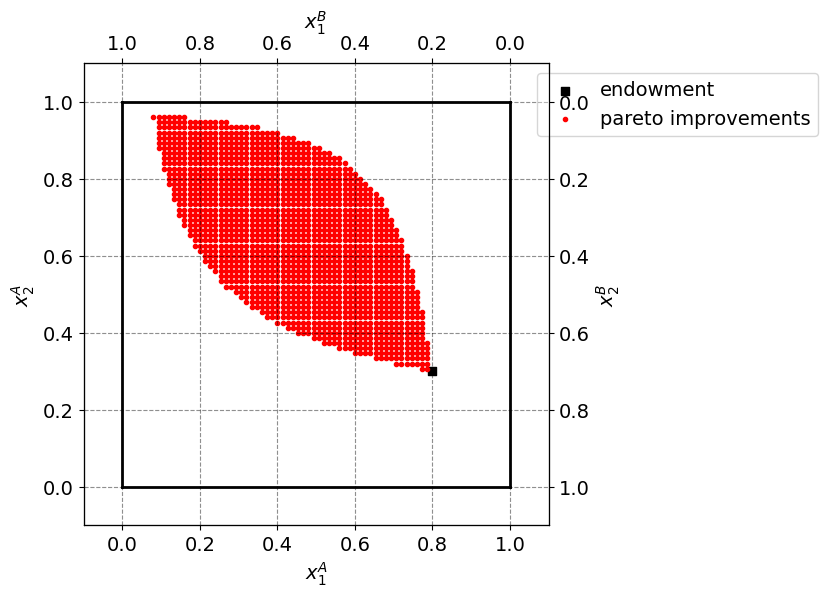

In [21]:
model=ExchangeEconomyClass()
model.question1()

list_x1A=model.list_x1A
list_x2A=model.list_x2A

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(model.par.w1A, model.par.w2A, marker='s', color='black', label='endowment')
ax_A.scatter(list_x1A,list_x2A,marker='.',color='red',label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

**Explain how you solve the model**

# Question 2

1. We initialize an instance of $\textbf{ExchangeEconomyClass}$. This class encapsulates the entire economic model, including preferences, endowments, and market-clearing mechanisms.

2. We call the $\textbf{check\_market\_clearing}$ method with a price of 2 to print the excess demand (or supply) errors at this price, which helps in understanding the initial state of market equilibrium.

3. We create three lists: $\textbf{price1}$, $\textbf{error1}$, and $\textbf{error2}$. These will store the different prices we evaluate and the corresponding errors in the market-clearing condition for both goods.

4. We iterate over a range of prices from 0.5 to 2.5, incrementally increasing by a factor determined by the loop's range. For each price, we compute the market-clearing errors $ \epsilon_1 $ and $ \epsilon_2 $ and append them along with the price to their respective lists.

5. We establish a plotting environment using $\textbf{matplotlib}$ with a specified figure size and DPI, and no frame, to visually represent the data.

6. On the subplot, We plot $\textbf{error1}$ and $\textbf{error2}$ against $\textbf{price1}$ with distinct colors and markers, labeling each data series to indicate which error term it represents.

7. We meticulously label the axes to reflect the economic terms: $ p_1 $ for the price on the horizontal axis and the errors on the vertical axis, enhancing the interpretability of the plot.


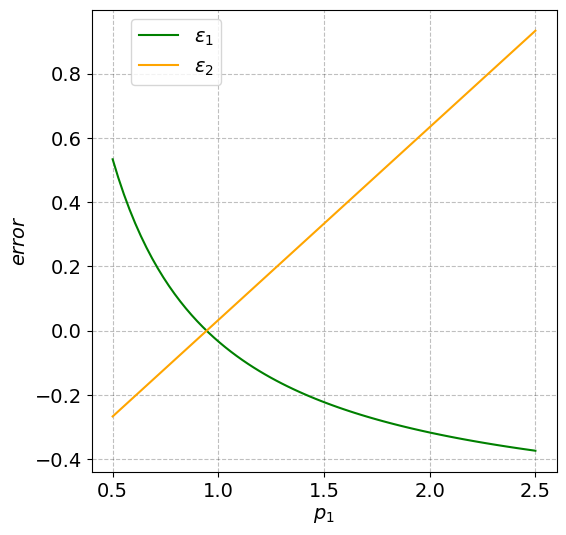

In [22]:
model = ExchangeEconomyClass()
model.question2()

# I get the error-lists from my .py file:
price_list = model.price_list
error1 = model.error1
error2 = model.error2

fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
plot = fig.add_subplot(1,1,1)
plot.set_xlabel("$p_1$")
plot.set_ylabel("$error$")

plot.plot(price_list, error1, marker='', color='green', label='$\epsilon_1$')  # Corrected label
plot.plot(price_list, error2, marker='', color='orange', label='$\epsilon_2$')
plot.legend(frameon=True,loc='upper right',bbox_to_anchor=(0.3,1))


# Question 3

To find the market clearing price, we have to find the price of $p_1$ in which both the error terms are zero.
Therefore, i loop over the same range as before, and look at where exactly $\epsilon_1 = 0$, which implies that $\epsilon_2 = 0$ as well. If i find it, i print the value where they cross, and thereby i am able to print the value of the market clearing price $p_1$



In [23]:
import math

# Assuming error1 and error2 are defined somewhere above
for i in range(76):
    
   if math.isclose(error1[i], 0, abs_tol=1e-2) and math.isclose(error2[i], 0, abs_tol=1e-2):
      print(f'The iterator where eps1 and eps2 crosses is: i={i}')
      print(f'The price that clears both markets is: p1={price_list[i]}')


The iterator where eps1 and eps2 crosses is: i=17
The price that clears both markets is: p1=0.9533333333333334


For further use, i also print the utility of A and B from the inital allocations:

In [24]:
print(f"Utility of A in the initial allocation: uA = {model.utility_A(model.par.w1A,model.par.w2A)}")
print(f"Utility of B in the initial allocation: uB = {model.utility_B(1-model.par.w1A,1-model.par.w2A)}")

Utility of A in the initial allocation: uA = 0.41601676461038084
Utility of B in the initial allocation: uB = 0.30365889718756617


## Question 4A

EXPLAIN CODE:

The biggest value for uA is: (0.633615985237553+0j) and it is achieved at price p1 = 1.8866666666666667


/Users/lukasriese/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lukasriese/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '$u^A$')

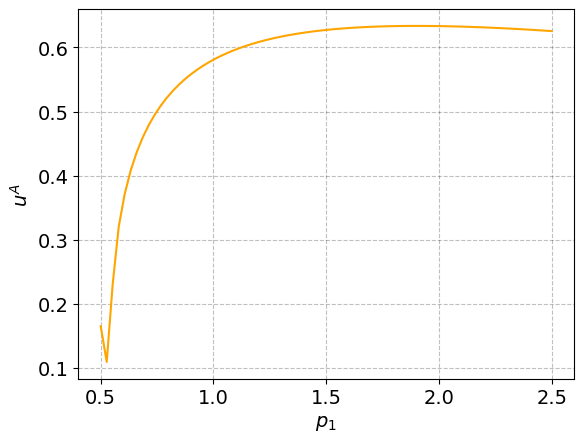

In [25]:
model = ExchangeEconomyClass()
model.question2()
price_list = model.price_list

# List for different utility-values for A:
list_uA = []

# Loop over each price in the list to calculate the utilities for consumer A
for p1 in price_list:
    # Calculate the demand for consumer B given the current price p1:
    x1B, x2B = model.demand_B(p1)
    
    x1A = 1 - x1B
    x2A = 1 - x2B

    # Calculate the utility for consumer A given their demand and append it to the list of utilities
    uA = model.utility_A(x1A, x2A)
    list_uA.append(uA)

# Convert list of utilities and prices to a numpy array:
list_uA = np.array(list_uA)
price_list = np.array(price_list)

# Find the index of the maximum utility value for consumer A
index_of_max_uA = np.argmax(list_uA)

# Use the index to find the corresponding price that gives the maximum utility for consumer A
price_with_max_uA = price_list[index_of_max_uA]

# Find the maximum utility value itself
max_uA_value = list_uA[index_of_max_uA]

# Print out the maximum utility value and the price at which it occurs
print(f"The biggest value for uA is: {max_uA_value} and it is achieved at price p1 = {price_with_max_uA}")

# Plot the utility values for consumer A against the values of p1
plt.plot(price_list, list_uA, marker='', color='orange')
plt.xlabel("$p_1$")  
plt.ylabel("$u^A$") 

#See that the biggest value for uA is: 0.4749306138030085 and it is achieved at price p_1 = 0.9533333333333334


## Question 4B

1. We define the $\textbf{objective}(p_1, \text{model})$ function to calculate the negative utility of consumer A for a given price $p_1$. This allows us to use the minimization algorithm of $\textbf{scipy.optimize}$ for our maximization problem by minimizing the negative utility.

2. We establish the $\textbf{constraint}(p_1, \text{model})$ function to ensure that consumer B's utility is not reduced below their utility from their initial endowment, enforcing this through an inequality constraint.

3. Utilizing $\textbf{scipy.optimize.minimize}$ with the $\textbf{SLSQP}$ method, we set up the optimization problem with constraints to find the optimal price $p_1$ that balances the utility maximization for consumer A without harming consumer B.

4. Upon finding the optimal $p_1$, we compute and print the optimal allocations for both consumers along with their utilities. This illustrates the economic efficiency and fairness achieved through the optimization process.


In [26]:
from scipy import optimize
model = ExchangeEconomyClass()

def objective(p1, model):
    # This function aims to maximize the utility of consumer A by adjusting the price p1.
    # Since scipy.optimize minimizes functions, we return the negative utility to simulate maximization.
    # Compute demands for A and B given price p1
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    # Compute the utility for A using the remaining goods (1 - x1B and 1 - x2B)
    # and return its negative value as the objective to maximize
    return -model.utility_A(1-x1B, 1-x2B)

# Define a constraint function to ensure B's utility is at least as high as with their initial endowment
def constraint(p1, model):
    # Compute B's utility given the price p1 and compare it to B's utility with initial endowment
    # This ensures that B is not worse off than they initially were
    x1B, x2B = model.demand_B(p1)
    utility_with_endowment = model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
    return model.utility_B(x1B, x2B) - utility_with_endowment

# Set up the constraint for scipy's optimizer in a dictionary format
# 'type': 'ineq' indicates that it is an inequality constraint (B's utility should not decrease)
cons = ({'type': 'ineq', 'fun': constraint, 'args': (model,)})

# Provide an initial guess for the price p1; optimization algorithms need a starting point
initial_guess = [1]

# Solve the optimization problem using scipy:
solution = optimize.minimize(
    objective, 
    initial_guess, 
    args=(model,),  # Additional arguments for the objective function
    method='SLSQP',  # Sequential Least Squares Programming optimization algorithm
    bounds=[(0, None)],  # p1 must be positive, hence the lower bound is 0 and no upper bound
    constraints=cons  # The constraints defined above
)

# Extract the optimal price p1 from the solution
optimal_p1 = solution.x[0]

# Compute the optimal allocations for A and B at the optimal price p1
x1A_optimal, x2A_optimal = model.demand_A(optimal_p1)
x1B_optimal, x2B_optimal = model.demand_B(optimal_p1)

# Print the results:
print(f"Optimal price p1: {optimal_p1}")
print(f"Optimal allocation for A: x1A = {1-x1B_optimal}, x2A = {1-x2B_optimal}")
print(f"Optimal allocation for B: x1B = {x1B_optimal}, x2B = {x2B_optimal}")
print(f"Utility for A: utility_A = {model.utility_A(1-x1B_optimal, 1-x2B_optimal)}")
print(f"Utility for B: utility_B = {model.utility_B(x1B_optimal, x2B_optimal)}")


Optimal price p1: 1.896780153407069
Optimal allocation for A: x1A = 0.6206356936894231, x2A = 0.6402146564395288
Optimal allocation for B: x1B = 0.37936430631057694, x2B = 0.35978534356047126
Utility for A: utility_A = 0.633620652587621
Utility for B: utility_B = 0.3727223768098567


## Question 5A

EXPLAIN CODE

1. We convert lists for allocations of good 1 and good 2 ($x_1^A$ and $x_2^A$) into numpy arrays, preparing for grid generation and utility evaluation.

2. Using $\textbf{np.meshgrid}$, we create a 2D grid of $x_1^A$ and $x_2^A$ values to map out consumer A's utility across different allocations.

3. We calculate the utility for consumer A across the grid with $\textbf{model.utility\_A}(X, Y)$, producing a surface matrix $Z$ that represents utility levels.

4. We plot the utility surface with $\textbf{plt.figure()}$ and $\textbf{ax.plot\_surface}(X, Y, Z)$, and label the axes $x_1^A$, $x_2^A$, and $u^A$ to visualize consumer A's utility landscape.


Text(0.5, 0, '$u^A$')

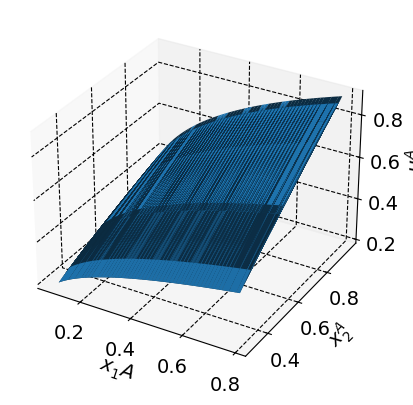

In [27]:
model = ExchangeEconomyClass()

# Convert lists containing allocations for good 1 (x1A) and good 2 (x2A) to numpy arrays
x1A_array = np.array(list_x1A)
x2A_array = np.array(list_x2A)

# Generate a 2D grid of x1A and x2A values using meshgrid:
X, Y = np.meshgrid(x1A_array, x2A_array)

# Evaluate the utility function for consumer A at each point in the grid:
Z = model.utility_A(X, Y)

%matplotlib inline

# Create a figure and a 3D subplot for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z)

# Label the axes:
ax.set_xlabel("$x_1 ^ A$")  
ax.set_ylabel("$x_2 ^A$")  
ax.set_zlabel("$u^A$")      

We use the same method as in question 4A to find the index where A's utility is maximized:

In [28]:
model = ExchangeEconomyClass()

# Create an empty list to store utility values of A:
utility_A_list = []

# Loop over pairs of allocations (x1A, x2A) for consumer A
for x1A, x2A in zip(list_x1A, list_x2A):
    # Calculate utility for consumer A at each allocation and append it to the utility list:
    utility_A = model.utility_A(x1A, x2A)
    utility_A_list.append(utility_A)

# Find the index of the maximum utility value in the list of utilities for consumer A
max_utility_index = np.argmax(utility_A_list)

# Use the index to find the maximum utility value itself
max_utility_value = utility_A_list[max_utility_index]

# Use the index to retrieve the allocations (x1A, x2A) corresponding to the maximum utility
max_x1A = list_x1A[max_utility_index]
max_x2A = list_x2A[max_utility_index]

# Print the results:
print(f"The maximum utility value is {max_utility_value}, achieved at utility_A_list's index {max_utility_index}, with x1A = {max_x1A} and x2A = {max_x2A}.")
print(f"The utility for B from the optimal allocation for A: utility_B = {model.utility_B(1-max_x1A,1-max_x2A)}")
print(f"The aggregate utility is: {max_utility_value + model.utility_B(1-max_x1A,1-max_x2A)}")

The maximum utility value is 0.7415523509091093, achieved at utility_A_list's index 1125, with x1A = 0.56 and x2A = 0.8533333333333334.
The utility for B from the optimal allocation for A: utility_B = 0.30507896071427915
The aggregate utility is: 1.0466313116233885


## Question 5B

1. We define the $\textbf{utility\_A}(x)$ function to return the negative utility of consumer A for allocations $x_1^A$ and $x_2^A$, facilitating a maximization problem via minimization in optimization.

2. The constraint function $\textbf{constraint}(x)$ ensures consumer B's utility with the allocations implied by A's choices does not fall below their baseline utility, acting as an inequality constraint.

3. We utilize $\textbf{optimize.minimize}$ with method 'SLSQP', bounds for $x_1^A$ and $x_2^A$ between 0 and 1, and the defined constraints to find the optimal allocations for consumer A that respect B's welfare.

4. After optimization, I extract and print the optimal allocations for consumers A and B, their respective utilities, and the aggregate utility to assess the outcomes of the allocation strategy.


In [29]:
from scipy import optimize
model = ExchangeEconomyClass()

def utility_A(x):
    return -model.utility_A(x[0], x[1])  # x[0] and x[1] represent x1A and x2A, respectively

# Define a constraint function to ensure that consumer B's utility is at least as high as with their initial endowment
def constraint(x):
    # Calculate consumer B's allocations implied by the given allocations for A (x)
    x1B = 1 - x[0]  
    x2B = 1 - x[1]  
    # Compute baseline utility for B with initial endowment
    baseline_utility_B = model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
    return model.utility_B(x1B, x2B) - baseline_utility_B

# Define the constraints for the optimizer in a list of dictionaries
cons = [{'type': 'ineq', 'fun': constraint}]

# Set bounds for the decision variables (x1A and x2A) to be between 0 and 1
bounds = ((0,1), (0,1))

# Initial guess:
initial_guess = [0.005,0.005]

# Optimize:
result = optimize.minimize(utility_A, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Extract the optimal allocations for A:
x1A_optimal = result.x[0]
x2A_optimal = result.x[1]

# Print results:
print(f"Optimal allocation for A: x1A = {x1A_optimal}, x2A = {x2A_optimal}")
print(f"Optimal allocation for B: x1B = {1-x1A_optimal}, x2B = {1-x2A_optimal}")
print(f"The utility for A from the optimal allocation for A: utility_A = {model.utility_A(x1A_optimal,x2A_optimal)}")
print(f"The utility for B from the optimal allocation for A: utility_B = {model.utility_B(1-x1A_optimal,1-x2A_optimal)}")
print(f"The aggregate utility is: {model.utility_A(x1A_optimal,x2A_optimal) + model.utility_B(1-x1A_optimal,1-x2A_optimal)}")


Optimal allocation for A: x1A = 0.5757452627945296, x2A = 0.8444376019117168
Optimal allocation for B: x1B = 0.42425473720547036, x2B = 0.1555623980882832
The utility for A from the optimal allocation for A: utility_A = 0.7432276079387364
The utility for B from the optimal allocation for A: utility_B = 0.30365889689563785
The aggregate utility is: 1.0468865048343743


## Question 6A

1. We define $\textbf{aggr\_utility}(x)$ to calculate the negative aggregate utility of consumers A and B, enabling maximization of total welfare through minimization.

2. Bounds are set for the allocations $x_1^A$ and $x_2^A$ between 0 and 1, ensuring feasible solutions within the optimization problem.

3. Utilizing $\textbf{optimize.minimize}$ with 'SLSQP' method and the specified bounds, we find the allocations that maximize aggregate utility, starting from an initial guess.

4. The optimal allocations for A and B are extracted and printed, alongside their individual utilities and the total aggregate utility, highlighting the efficiency of the allocation.


In [30]:
model = ExchangeEconomyClass()

def aggr_utility(x):
    # Define the aggregate utility function to be minimized:
    return -(model.utility_A(x[0], x[1]) + model.utility_B(1 - x[0], 1 - x[1]))

# Set bounds for the decision variables (x1A and x2A) to be between 0 and 1
bounds = ((0, 1), (0, 1))

# Specify an initial guess for the starting point of the optimization algorithm
initial_guess = [0.005, 0.005]

# Solve the optimization problem to find the allocations that maximize the aggregate utility:
result = optimize.minimize(aggr_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Extract the optimal allocations for A:
x1A_optimal6 = result.x[0]
x2A_optimal6 = result.x[1]

# Print results:
print(f"Optimal allocation for A: x1A = {x1A_optimal6}, x2A = {x2A_optimal6}, yielding a utility of: utilityA = {model.utility_A(x1A_optimal6, x2A_optimal6)}")
print(f"Optimal allocation for B: x1B = {1 - x1A_optimal6}, x2B = {1 - x2A_optimal6}, yielding a utility of: utilityB = {model.utility_B(1 - x1A_optimal6, 1 - x2A_optimal6)}")
print(f"Aggregate utility for optimal allocation: aggr_utility = {-result.fun}")


Optimal allocation for A: x1A = 0.33244919929743433, x2A = 0.6653638045669772, yielding a utility of: utilityA = 0.5279764419470893
Optimal allocation for B: x1B = 0.6675508007025657, x2B = 0.3346361954330228, yielding a utility of: utilityB = 0.5302905063195885
Aggregate utility for optimal allocation: aggr_utility = 1.0582669482666778


## Question 6B

In question 3, we had the utilities of A and B in the initial allocations was:
uA = 0.41
uB = 0.3
aggr = 0.71

In question 4, where A chose any price to maximize her own utility, but was restricted on the allocations, we had:
uA = 0.63
uB = 0.37
Aggr = 1.0

In question 5, where A was the market planner, and could chose any allocation possible, as long as B's utility was as leat as big as in the endownment, we had:
uA = 0.74
uB = 0.3
Aggr = 1.04

Finally, in question 6, where an extern planner maximizes social utility, we have:
uA = 0.52
uB = 0.53
Aggr = 1.05

We make four lists, each with a list of the question-names, the utility of A, the utility of B as well as the aggregate utility:

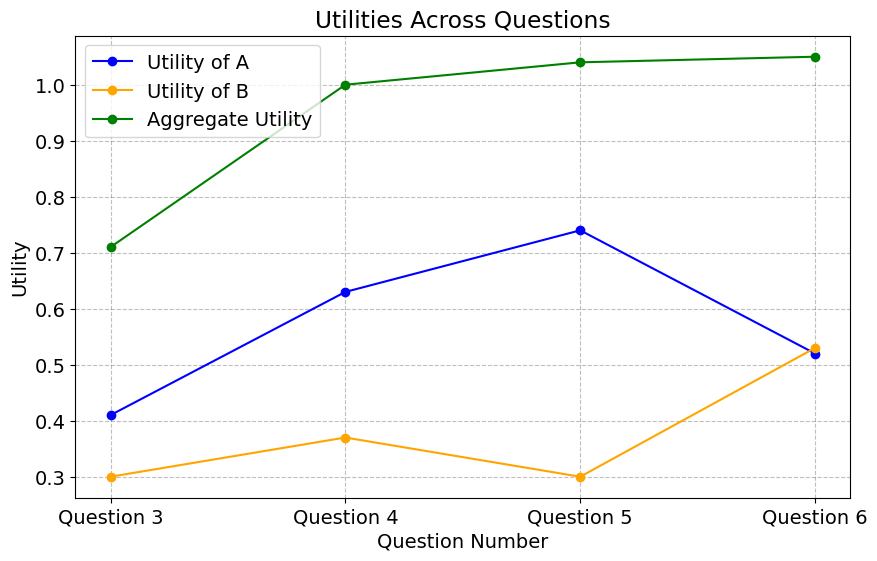

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data
questions_numbers = np.array([3, 4, 5, 6])  # Numerical values for positioning
questions_labels = ['Question 3', 'Question 4', 'Question 5', 'Question 6']  # Labels for x-axis
uA = [0.41, 0.63, 0.74, 0.52]
uB = [0.3, 0.37, 0.3, 0.53]
Aggr = [0.71, 1.0, 1.04, 1.05]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for uA with dots connected
plt.plot(questions_numbers, uA, '-o', label='Utility of A', color='blue')
# Plot for uB with dots connected
plt.plot(questions_numbers, uB, '-o', label='Utility of B', color='orange')
# Plot for Aggr with dots connected
plt.plot(questions_numbers, Aggr, '-o', label='Aggregate Utility', color='green')

plt.title('Utilities Across Questions')
plt.xlabel('Question Number')
plt.ylabel('Utility')
plt.xticks(questions_numbers, questions_labels)  # Set custom labels for the x-axis
plt.grid(True)
plt.legend()
plt.show()


It's clear that A get's the biggest utility when being the market planner and being able to pick any allocation.
On the other side, B get's the biggest utility when A is not deciding the allocation, as in question 6.
Finally, the social utility is the highest when there is a third part planning the allocation, as in question 6.

## Question 7

1. We generate lists $\textbf{w1A\_list}$ and $\textbf{w2A\_list}$, each containing 50 random values between 0 and 1, representing the initial endowments of good 1 and good 2 for consumer A.

2. Using $\textbf{zip}$, we combine $\textbf{w1A\_list}$ and $\textbf{w2A\_list}$ into $\textbf{wA\_list}$, creating a list of tuples that pair each good 1 endowment with its corresponding good 2 endowment for consumer A.


In [41]:
w1A_list = [np.random.uniform(0,1,size=50)]
w2A_list=[np.random.uniform(0,1,size=50)]

W = list(zip(w1A_list, w2A_list))

## Question 8

We do the following:
1. Regenerate random endowments for consumer A for two goods.
2. Pair the generated endowments and initialize lists to store equilibrium allocations.
3. Iterate over the endowment pairs, computing the market-clearing price and corresponding demands.
4. Reset the model parameters to their original values after the loop.
5. Plot the equilibrium allocations in the Edgeworth box with the appropriate axis labels and limits.

In [42]:
#We repeat the process above and zip the two lists into one:
w1A_list = np.random.uniform(0, 1, size=50)
w2A_list = np.random.uniform(0, 1, size=50)

W = list(zip(w1A_list, w2A_list))
x1_E = []
x2_E = []

P1_guess = 2

model = ExchangeEconomyClass()

original_w1A = model.par.w1A
original_w2A = model.par.w2A

for w1A, w2A in W:
    model.par.w1A = w1A
    model.par.w2A = w2A
    p1_clearing = model.market_clearing_price_Q8(P1_guess)
    x1, x2 = model.demand_A(p1_clearing)
    x1_E.append(x1)
    x2_E.append(x2)

model.par.w1A = original_w1A
model.par.w2A = original_w2A

x1_E = np.array(x1_E)
x2_E = np.array(x2_E)

w1bar = 1.0
w2bar = 1.0

# We make an edgeworth box with the 50 efficient allocations:

fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(x1_E, x2_E, label="equilibrium", color="red", marker=".")

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()